In [1]:
import pandas as pd 
import numpy as np 
import pickle 
pd.set_option('display.max_columns', None)

In [3]:
all_df_30D= pd.read_csv("/data/u_AA/throughput_opt/new_KPI.csv")

# all_df_30D['CELL_NAME'] = all_df_30D['CELL_NAME'].str.replace('-', '_')
# all_df_30D['band'] = all_df_30D["CELL_NAME"].str.split('_').str.get(-2)
# all_df_30D['band_letter'] = all_df_30D['band'].str.get(0)

all_df_30D= all_df_30D[~(all_df_30D.DL_TRAFFIC_GB <= 0.1)]
all_df_30D= all_df_30D[~(all_df_30D.PRB_DL_AVAILABLE > 100)]
all_df_30D= all_df_30D[~(all_df_30D.DL_PRB_UTI== 0)]
#all_df_30D= all_df_30D[(all_df_30D['band_letter']=='D') | (all_df_30D['band_letter']=='T')]



In [4]:
all_df_30D

,DATE_ID,HOUR_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE
0,29-MAR-24 00.00.00,20,LCAI1993_19932_R_H_D6-2,0.3465,7.4068,1.5237,0.0304,11.996,17.05,0.74,4.72,5.72,4.789,89.0,5.73,1.92,0.00,0.00
1,29-MAR-24 00.00.00,15,LCAI1993_19933_N_H_D6-3,9.4344,12.3100,0.6579,0.5160,80.318,40.87,11.01,62.30,65.00,66.976,95.0,8.90,38.45,0.03,0.01
2,29-MAR-24 00.00.00,0,LCAI1993_19934_N_H_D6-4,2.1060,12.5476,1.9003,0.2050,33.318,25.33,6.46,34.23,41.24,26.423,93.0,6.86,34.22,0.39,0.00
3,29-MAR-24 00.00.00,0,LCAI1993_19936_N_H_G1-1,1.0420,3.3919,0.3874,0.1489,78.984,63.40,3.15,19.93,21.02,23.149,25.0,8.92,25.51,0.00,0.00
4,29-MAR-24 00.00.00,14,LCAI1993_19937_N_H_G1-2,1.6058,1.3170,0.4334,0.2423,85.584,86.35,5.02,30.08,29.06,32.331,25.0,7.79,24.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365596,03-APR-24 00.00.00,2,LALX3837_38372_N_H_D7-2,1.2168,18.1870,3.2278,0.0659,13.531,10.75,0.00,0.03,0.04,2.904,93.0,8.18,16.29,0.00,0.00
1365597,03-APR-24 00.00.00,0,LALX3837_38373_N_H_D7-3,1.4445,16.3793,1.2397,0.0547,21.980,18.65,1.00,4.40,4.83,5.777,95.0,10.31,12.57,0.00,0.00
1365601,03-APR-24 00.00.00,17,LALX3838_38381_N_H_D3-1,2.2492,19.9210,3.1619,0.2115,24.095,27.79,1.16,6.67,6.67,14.924,75.0,8.44,39.99,0.00,0.00
1365602,03-APR-24 00.00.00,0,LALX3838_38382_N_H_D3-2,4.5206,2.7173,0.5939,0.3904,92.584,52.90,1.41,11.09,12.71,31.623,75.0,6.61,17.32,0.00,0.00


In [3]:
new_param=pd.read_csv("/data/u_AA/throughput_opt/HUAWEI_OC_CELL_PARAMTER.csv")
new_param2= pd.read_csv("/data/u_AA/throughput_opt/Huawei_paramaters_cells_export.csv")

In [12]:
all_df_30D

,DATE_ID,HOUR_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE
0,29-MAR-24 00.00.00,20,LCAI1993_19932_R_H_D6-2,0.3465,7.4068,1.5237,0.0304,11.996,17.05,0.74,4.72,5.72,4.789,89.0,5.73,1.92,0.00,0.00
1,29-MAR-24 00.00.00,15,LCAI1993_19933_N_H_D6-3,9.4344,12.3100,0.6579,0.5160,80.318,40.87,11.01,62.30,65.00,66.976,95.0,8.90,38.45,0.03,0.01
2,29-MAR-24 00.00.00,0,LCAI1993_19934_N_H_D6-4,2.1060,12.5476,1.9003,0.2050,33.318,25.33,6.46,34.23,41.24,26.423,93.0,6.86,34.22,0.39,0.00
3,29-MAR-24 00.00.00,0,LCAI1993_19936_N_H_G1-1,1.0420,3.3919,0.3874,0.1489,78.984,63.40,3.15,19.93,21.02,23.149,25.0,8.92,25.51,0.00,0.00
4,29-MAR-24 00.00.00,14,LCAI1993_19937_N_H_G1-2,1.6058,1.3170,0.4334,0.2423,85.584,86.35,5.02,30.08,29.06,32.331,25.0,7.79,24.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365596,03-APR-24 00.00.00,2,LALX3837_38372_N_H_D7-2,1.2168,18.1870,3.2278,0.0659,13.531,10.75,0.00,0.03,0.04,2.904,93.0,8.18,16.29,0.00,0.00
1365597,03-APR-24 00.00.00,0,LALX3837_38373_N_H_D7-3,1.4445,16.3793,1.2397,0.0547,21.980,18.65,1.00,4.40,4.83,5.777,95.0,10.31,12.57,0.00,0.00
1365601,03-APR-24 00.00.00,17,LALX3838_38381_N_H_D3-1,2.2492,19.9210,3.1619,0.2115,24.095,27.79,1.16,6.67,6.67,14.924,75.0,8.44,39.99,0.00,0.00
1365602,03-APR-24 00.00.00,0,LALX3838_38382_N_H_D3-2,4.5206,2.7173,0.5939,0.3904,92.584,52.90,1.41,11.09,12.71,31.623,75.0,6.61,17.32,0.00,0.00


In [6]:
new_param2.isnull().sum()

DATE_ID                       0
HOUR_ID                       0
SITE_ID                       0
SITE_NENAME                   0
CELL_NAME                  3148
CELL_ID                       0
MIMO_ADAPTIVE_SWITCH       1029
FIXED_MIMO_MODE            1038
MAXMIMORANKPARA           23471
REFERENCESIGNALPWR            0
PB                            0
DLBANDWIDTH                2883
ULBANDWIDTH                2883
SPECTRUMCLOUDSWITCH       24521
PAPCOFF                     881
MAXIMUM_TRANSMIT_POWER     3148
CELL_MAP                   3148
DEVICENO                  17899
TILT                      18207
dtype: int64

In [7]:

merged_lookup = pd.concat([new_param, new_param2], ignore_index=True)
merged_lookup.drop(['CELL_ID'],axis=1,inplace=True)
merged_lookup.drop_duplicates(inplace=True)
#cells_params_30D= merged = pd.merge(all_df_30D,merged_lookup[['SITE_ID','CELL_NAME','MAXMIMORANKPARA','REFERENCESIGNALPWR','MAXIMUM_TRANSMIT_POWER']],how='left',on='CELL_NAME')

In [4]:
merged_lookup

NameError: name 'merged_lookup' is not defined

In [8]:
cells_params_30D.dropna(subset=['REFERENCESIGNALPWR','MAXIMUM_TRANSMIT_POWER'],inplace=True)

NameError: name 'cells_params_30D' is not defined

In [56]:
cells_params_30D.MAXMIMORANKPARA.value_counts(dropna=False)

NaN      386296
Rank2    216922
Rank4     81774
Name: MAXMIMORANKPARA, dtype: int64

In [34]:
param3=pd.read_csv('/data/u_AA/throughput_opt/DSP_H_CELLS_PARAMTERS_EXTRACT.csv')


In [35]:
cells =merged_lookup[(merged_lookup.CELL_NAME.isin(param3.CELL_NAME.unique()))& (merged_lookup.MAXMIMORANKPARA.isna())].CELL_NAME

NameError: name 'cell' is not defined

In [20]:
param3[param3.CELL_NAME.isin(cells)].isnull().sum()

DATE_ID                       0
HOUR_ID                       0
SITE_ID                       0
SITE_NENAME                   0
CELL_NAME                   353
CELL_ID                       0
MIMO_ADAPTIVE_SWITCH          3
FIXED_MIMO_MODE               7
MAXMIMORANKPARA              35
REFERENCESIGNALPWR            0
PB                            0
DLBANDWIDTH                  45
ULBANDWIDTH                  45
SPECTRUMCLOUDSWITCH       11688
PAPCOFF                      64
MAXIMUM_TRANSMIT_POWER      353
dtype: int64

In [36]:
merged_lookup.isna().sum()

DATE_ID                       0
HOUR_ID                       0
SITE_ID                       0
SITE_NENAME                   0
CELL_NAME                  1901
MIMO_ADAPTIVE_SWITCH       1029
FIXED_MIMO_MODE            1036
MAXMIMORANKPARA           23469
REFERENCESIGNALPWR            0
PB                            0
DLBANDWIDTH                2882
ULBANDWIDTH                2882
SPECTRUMCLOUDSWITCH       24335
PAPCOFF                     880
MAXIMUM_TRANSMIT_POWER     1901
CELL_MAP                   1901
DEVICENO                  16652
TILT                      16960
dtype: int64

In [21]:
merged_lookup[merged_lookup.CELL_NAME.isin(cells)].isnull().sum()

DATE_ID                       0
HOUR_ID                       0
SITE_ID                       0
SITE_NENAME                   0
CELL_NAME                  1901
MIMO_ADAPTIVE_SWITCH        105
FIXED_MIMO_MODE             111
MAXMIMORANKPARA           14803
REFERENCESIGNALPWR            0
PB                            0
DLBANDWIDTH                2064
ULBANDWIDTH                2064
SPECTRUMCLOUDSWITCH       11844
PAPCOFF                     478
MAXIMUM_TRANSMIT_POWER     1901
CELL_MAP                   1901
DEVICENO                   7591
TILT                       7764
dtype: int64

In [37]:
param3_mapping = param3[param3.CELL_NAME.isin(cells)].set_index('CELL_NAME')['MAXMIMORANKPARA'].to_dict()

# Then use map to replace null values in merged_lookup['MAXMIMORANKPARA'] with values from param3
merged_lookup['MAXMIMORANKPARA'] = merged_lookup['MAXMIMORANKPARA'].fillna(merged_lookup['CELL_NAME'].map(param3_mapping))

In [38]:
merged_lookup.isnull().sum()

DATE_ID                       0
HOUR_ID                       0
SITE_ID                       0
SITE_NENAME                   0
CELL_NAME                  1901
MIMO_ADAPTIVE_SWITCH       1029
FIXED_MIMO_MODE            1036
MAXMIMORANKPARA            8695
REFERENCESIGNALPWR            0
PB                            0
DLBANDWIDTH                2882
ULBANDWIDTH                2882
SPECTRUMCLOUDSWITCH       24335
PAPCOFF                     880
MAXIMUM_TRANSMIT_POWER     1901
CELL_MAP                   1901
DEVICENO                  16652
TILT                      16960
dtype: int64

In [39]:
merged_lookup.MAXMIMORANKPARA.value_counts(dropna=False)

Rank2    15950
Rank4    10729
NaN       8695
Name: MAXMIMORANKPARA, dtype: int64

In [ ]:
merged_lookup[merged_lookup.CELL_NAME.isin(cells)]

In [32]:
merged_lookup[merged_lookup.CELL_NAME.isin(cells)]

,DATE_ID,HOUR_ID,SITE_ID,SITE_NENAME,CELL_NAME,MIMO_ADAPTIVE_SWITCH,FIXED_MIMO_MODE,MAXMIMORANKPARA,REFERENCESIGNALPWR,PB,DLBANDWIDTH,ULBANDWIDTH,SPECTRUMCLOUDSWITCH,PAPCOFF,MAXIMUM_TRANSMIT_POWER,CELL_MAP,DEVICENO,TILT
3,2024-03-18,13,UPP5566,LUPP5566,LUPP5566_55664_N_H_D6-4,NO_ADAPTIVE,TM4,Rank2,182,1,20M,20M,GL_SPECTRUM_CONCURRENCY,0.0,460.0,UPP5566_1800_4,15.0,50.0
11,2024-03-18,13,UPP5039,LUPP5039,LUPP5039_50394_N_H_D8-4,NO_ADAPTIVE,TM4,Rank2,182,1,20M,20M,GL_SPECTRUM_CONCURRENCY,0.0,460.0,UPP5039_1800_4,NaN,NaN
12,2024-03-18,13,UPP5039,LUPP5039,LUPP5039_50396_N_H_G2-1,NO_ADAPTIVE,TM4,Rank2,174,0,3M,3M,NaN,0.0,430.0,UPP5039_0900_1,NaN,NaN
13,2024-03-18,13,UPP5039,LUPP5039,LUPP5039_50397_N_H_G2-2,NO_ADAPTIVE,TM4,Rank2,174,0,3M,3M,NaN,0.0,430.0,UPP5039_0900_2,NaN,NaN
14,2024-03-18,13,UPP5039,LUPP5039,LUPP5039_50398_N_H_G2-3,NO_ADAPTIVE,TM4,Rank2,174,0,3M,3M,NaN,0.0,430.0,UPP5039_0900_3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40466,2024-03-18,13,CAI0563,ULCAI0563,NaN,NO_ADAPTIVE,TM4,Rank2,182,1,20M,20M,NaN,0.0,NaN,NaN,NaN,NaN
40468,2024-03-18,13,CAI0563,ULCAI0563,NaN,NO_ADAPTIVE,TM4,Rank2,182,0,5M,5M,NaN,0.0,NaN,NaN,NaN,NaN
40469,2024-03-18,13,CAI0563,ULCAI0563,NaN,NO_ADAPTIVE,TM4,Rank4,182,0,5M,5M,NaN,0.0,NaN,NaN,NaN,NaN
40540,2024-03-18,13,CAI4364,GUL_CAI4364,NaN,NO_ADAPTIVE,TM4,Rank2,182,1,15M,15M,GL_SPECTRUM_CONCURRENCY,0.0,NaN,NaN,NaN,NaN


In [40]:
merged_lookup.to_parquet('/data/u_AA/throughput_opt/parameters_lookup')

In [5]:
merged_lookup= pd.read_parquet('/data/u_AA/throughput_opt/parameters_lookup')
merged_lookup

,DATE_ID,HOUR_ID,SITE_ID,SITE_NENAME,CELL_NAME,MIMO_ADAPTIVE_SWITCH,FIXED_MIMO_MODE,MAXMIMORANKPARA,REFERENCESIGNALPWR,PB,DLBANDWIDTH,ULBANDWIDTH,SPECTRUMCLOUDSWITCH,PAPCOFF,MAXIMUM_TRANSMIT_POWER,CELL_MAP,DEVICENO,TILT
0,2024-03-18,13,UPP5566,LUPP5566,LUPP5566_55661_N_H_D6-1,NO_ADAPTIVE,TM4,Rank2,152,0,20M,20M,GL_SPECTRUM_CONCURRENCY,0.0,460.0,UPP5566_1800_1,2.0,50.0
1,2024-03-18,13,UPP5566,LUPP5566,LUPP5566_55662_N_H_D6-2,NO_ADAPTIVE,TM4,Rank2,152,0,20M,20M,GL_SPECTRUM_CONCURRENCY,0.0,460.0,UPP5566_1800_2,7.0,30.0
2,2024-03-18,13,UPP5566,LUPP5566,LUPP5566_55663_N_H_D6-3,NO_ADAPTIVE,TM4,Rank2,182,1,20M,20M,GL_SPECTRUM_CONCURRENCY,0.0,460.0,UPP5566_1800_3,11.0,20.0
3,2024-03-18,13,UPP5566,LUPP5566,LUPP5566_55664_N_H_D6-4,NO_ADAPTIVE,TM4,Rank2,182,1,20M,20M,GL_SPECTRUM_CONCURRENCY,0.0,460.0,UPP5566_1800_4,15.0,50.0
4,2024-03-18,13,UPP5566,LUPP5566,LUPP5566_45666_N_H_T8-1,NO_ADAPTIVE,TM4,None,179,1,20M,20M,None,0.0,470.0,UPP5566_2600_1,4.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41254,2024-03-18,13,CAI2553,GUL_CAI2553,LCAI2553_25531_N_H_D6-1,NO_ADAPTIVE,TM4,Rank4,170,0,20M,20M,None,0.0,478.0,CAI2553_1800_1,3.0,70.0
41255,2024-03-18,13,CAI2553,GUL_CAI2553,LCAI2553_25532_N_H_D6-2,NO_ADAPTIVE,TM4,Rank4,170,0,20M,20M,None,0.0,478.0,CAI2553_1800_2,8.0,90.0
41256,2024-03-18,13,CAI2553,GUL_CAI2553,LCAI2553_25533_N_H_D6-3,NO_ADAPTIVE,TM4,Rank4,152,0,20M,20M,None,0.0,460.0,CAI2553_1800_3,13.0,90.0
41257,2024-03-18,13,CAI2553,GUL_CAI2553,LCAI2553_25536_N_H_G1-1,NO_ADAPTIVE,TM4,None,182,0,5M,5M,None,0.0,460.0,CAI2553_0900_1,0.0,80.0


In [6]:
cells_params_30D= pd.merge(all_df_30D,merged_lookup[['CELL_NAME','MAXMIMORANKPARA','REFERENCESIGNALPWR','MAXIMUM_TRANSMIT_POWER']],how='left',on='CELL_NAME')

In [7]:
cells_params_30D.isnull().sum()

DATE_ID                        0
HOUR_ID                        0
CELL_NAME                      0
DL_TRAFFIC_GB                  0
DL_THROUGHPUT                  0
UL_THROUGHPUT                  0
UL_TRAFFIC_GB                  0
DL_PRB_UTI                     0
CCE_UTI                        0
VOLTE_DL_TRAFFIC_ERL           0
VOLTE_DL_TRAFFIC_MB            0
VOLTE_UL_TRAFFIC_MB            0
AVG_ACTIVE_UE_DL             128
PRB_DL_AVAILABLE               0
CQI_AVERAGE                    0
MIMO_RANK_2_PERCENTAGE         0
MIMO_RANK_3_PERCENTAGE         0
MIMO_RANK_4_PERCENTAGE         0
MAXMIMORANKPARA           553887
REFERENCESIGNALPWR        327518
MAXIMUM_TRANSMIT_POWER    327518
dtype: int64

In [8]:
cells_params_30D['CELL_NAME'] = cells_params_30D['CELL_NAME'].str.replace('-', '_')
cells_params_30D['band'] = cells_params_30D["CELL_NAME"].str.split('_').str.get(-2)
cells_params_30D['band_letter'] = cells_params_30D['band'].str.get(0)
cells_params_30D= cells_params_30D[(cells_params_30D['band_letter']=='D') | (cells_params_30D['band_letter']=='T')]

In [9]:
cells_params_30D.isna().sum()

DATE_ID                        0
HOUR_ID                        0
CELL_NAME                      0
DL_TRAFFIC_GB                  0
DL_THROUGHPUT                  0
UL_THROUGHPUT                  0
UL_TRAFFIC_GB                  0
DL_PRB_UTI                     0
CCE_UTI                        0
VOLTE_DL_TRAFFIC_ERL           0
VOLTE_DL_TRAFFIC_MB            0
VOLTE_UL_TRAFFIC_MB            0
AVG_ACTIVE_UE_DL             128
PRB_DL_AVAILABLE               0
CQI_AVERAGE                    0
MIMO_RANK_2_PERCENTAGE         0
MIMO_RANK_3_PERCENTAGE         0
MIMO_RANK_4_PERCENTAGE         0
MAXMIMORANKPARA           438669
REFERENCESIGNALPWR        284374
MAXIMUM_TRANSMIT_POWER    284374
band                           0
band_letter                    0
dtype: int64

In [10]:
cells_params_30D[cells_params_30D.duplicated()]

,DATE_ID,HOUR_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,MAXMIMORANKPARA,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_letter


In [26]:
cells_params_30D.to_parquet('/data/u_AA/throughput_opt/cells_30D_parameters_new_KPI.parquet')

### Data preparation

In [3]:
cells_params_30D= pd.read_parquet('/data/u_AA/throughput_opt/cells_30D_parameters_new_KPI.parquet')

In [4]:
cells_params_30D.describe()

,HOUR_ID,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER
count,987763.000000,987763.000000,987763.000000,987763.000000,987763.000000,987763.000000,987763.000000,987763.000000,987763.000000,987763.000000,987635.000000,987763.000000,987763.000000,987763.000000,987763.000000,987763.000000,703389.000000,703389.000000
mean,13.133525,3.716397,14.189501,1.938755,0.358659,44.089048,25.323565,2.579920,17.040966,18.368447,34.775593,94.434341,9.254096,35.049759,0.225829,0.015501,172.750916,471.069059
std,8.740527,2.616673,12.409927,1.243908,0.353839,27.234735,11.873422,4.232874,27.024848,29.927676,32.330644,6.761818,1.555127,19.824287,1.456799,0.221932,15.966374,850.089654
min,0.000000,0.100100,0.000000,0.000000,0.000400,0.842000,1.920000,0.000000,0.000000,0.000000,0.012000,50.000000,2.950000,0.000000,0.000000,0.000000,-96.000000,152.000000
25%,3.000000,1.689400,5.911650,1.266700,0.115800,20.593000,16.230000,0.150000,1.280000,1.290000,11.132000,90.000000,8.150000,20.490000,0.000000,0.000000,152.000000,460.000000
50%,15.000000,3.251200,10.479800,1.770200,0.266100,41.218000,24.840000,0.830000,6.630000,6.870000,25.942000,97.000000,9.220000,32.420000,0.000000,0.000000,182.000000,460.000000
75%,21.000000,5.237500,18.346250,2.302400,0.495700,66.060000,33.220000,3.090000,20.610000,21.860000,49.041000,100.000000,10.320000,46.930000,0.050000,0.000000,182.000000,476.000000
max,23.000000,42.370300,248.933700,53.967200,15.222600,99.996000,90.530000,72.770000,518.750000,576.780000,578.365000,100.000000,14.990000,100.000000,98.400000,71.720000,223.000000,65535.000000


In [5]:
cells_params_30D

,DATE_ID,HOUR_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,MAXMIMORANKPARA,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_letter
0,29-MAR-24 00.00.00,20,LCAI1993_19932_R_H_D6_2,0.3465,7.4068,1.5237,0.0304,11.996,17.05,0.74,4.72,5.72,4.789,89.0,5.73,1.92,0.00,0.00,None,NaN,NaN,D6,D
1,29-MAR-24 00.00.00,15,LCAI1993_19933_N_H_D6_3,9.4344,12.3100,0.6579,0.5160,80.318,40.87,11.01,62.30,65.00,66.976,95.0,8.90,38.45,0.03,0.01,None,NaN,NaN,D6,D
2,29-MAR-24 00.00.00,0,LCAI1993_19934_N_H_D6_4,2.1060,12.5476,1.9003,0.2050,33.318,25.33,6.46,34.23,41.24,26.423,93.0,6.86,34.22,0.39,0.00,None,NaN,NaN,D6,D
7,29-MAR-24 00.00.00,3,LCAI1993_37372_S_H_D6_2,2.2151,9.9699,1.8646,0.1141,34.957,30.13,1.59,9.39,11.58,13.941,89.0,6.92,9.63,0.00,0.00,None,NaN,NaN,D6,D
8,29-MAR-24 00.00.00,20,LCAI1993_37375_U_H_D6_2,0.3858,9.7426,2.3282,0.0406,9.645,14.74,1.33,7.89,10.42,5.332,89.0,7.68,17.36,0.00,0.00,None,NaN,NaN,D6,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130016,03-APR-24 00.00.00,2,LALX3837_38372_N_H_D7_2,1.2168,18.1870,3.2278,0.0659,13.531,10.75,0.00,0.03,0.04,2.904,93.0,8.18,16.29,0.00,0.00,Rank2,182.0,460.0,D7,D
1130017,03-APR-24 00.00.00,0,LALX3837_38373_N_H_D7_3,1.4445,16.3793,1.2397,0.0547,21.980,18.65,1.00,4.40,4.83,5.777,95.0,10.31,12.57,0.00,0.00,Rank2,182.0,460.0,D7,D
1130018,03-APR-24 00.00.00,17,LALX3838_38381_N_H_D3_1,2.2492,19.9210,3.1619,0.2115,24.095,27.79,1.16,6.67,6.67,14.924,75.0,8.44,39.99,0.00,0.00,None,NaN,NaN,D3,D
1130019,03-APR-24 00.00.00,0,LALX3838_38382_N_H_D3_2,4.5206,2.7173,0.5939,0.3904,92.584,52.90,1.41,11.09,12.71,31.623,75.0,6.61,17.32,0.00,0.00,None,NaN,NaN,D3,D


In [6]:
# cells_params_30D.MAXMIMORANKPARA.fillna('Rank2',inplace=True)

In [7]:
cells_params_30D.isna().sum()

DATE_ID                        0
HOUR_ID                        0
CELL_NAME                      0
DL_TRAFFIC_GB                  0
DL_THROUGHPUT                  0
UL_THROUGHPUT                  0
UL_TRAFFIC_GB                  0
DL_PRB_UTI                     0
CCE_UTI                        0
VOLTE_DL_TRAFFIC_ERL           0
VOLTE_DL_TRAFFIC_MB            0
VOLTE_UL_TRAFFIC_MB            0
AVG_ACTIVE_UE_DL             128
PRB_DL_AVAILABLE               0
CQI_AVERAGE                    0
MIMO_RANK_2_PERCENTAGE         0
MIMO_RANK_3_PERCENTAGE         0
MIMO_RANK_4_PERCENTAGE         0
MAXMIMORANKPARA           438669
REFERENCESIGNALPWR        284374
MAXIMUM_TRANSMIT_POWER    284374
band                           0
band_letter                    0
dtype: int64

In [8]:
cells_params_30D.dropna(subset=['REFERENCESIGNALPWR','MAXIMUM_TRANSMIT_POWER'],inplace=True)

In [9]:
cells_params_30D.isna().sum()

DATE_ID                        0
HOUR_ID                        0
CELL_NAME                      0
DL_TRAFFIC_GB                  0
DL_THROUGHPUT                  0
UL_THROUGHPUT                  0
UL_TRAFFIC_GB                  0
DL_PRB_UTI                     0
CCE_UTI                        0
VOLTE_DL_TRAFFIC_ERL           0
VOLTE_DL_TRAFFIC_MB            0
VOLTE_UL_TRAFFIC_MB            0
AVG_ACTIVE_UE_DL               6
PRB_DL_AVAILABLE               0
CQI_AVERAGE                    0
MIMO_RANK_2_PERCENTAGE         0
MIMO_RANK_3_PERCENTAGE         0
MIMO_RANK_4_PERCENTAGE         0
MAXMIMORANKPARA           154295
REFERENCESIGNALPWR             0
MAXIMUM_TRANSMIT_POWER         0
band                           0
band_letter                    0
dtype: int64

In [10]:
cells_params_30D.MAXMIMORANKPARA.fillna('Rank2',inplace=True)

In [11]:
cells_params_30D[((cells_params_30D['REFERENCESIGNALPWR']<0 )|(cells_params_30D['MAXIMUM_TRANSMIT_POWER']==65535))].to_csv('/data/u_AA/throughput_opt/cell_paramters_issue.csv',index=False)

In [12]:
cells_params_30D=cells_params_30D[cells_params_30D['CQI_AVERAGE'].notna()]
cells_params_30D=cells_params_30D[cells_params_30D['AVG_ACTIVE_UE_DL'].notna()]
cells_params_30D=cells_params_30D[cells_params_30D['PRB_DL_AVAILABLE'].notna()]
cells_params_30D=cells_params_30D[~((cells_params_30D['REFERENCESIGNALPWR']<0 )|(cells_params_30D['MAXIMUM_TRANSMIT_POWER']==65535))]

In [13]:
cells_params_30D.describe(include='all')

,DATE_ID,HOUR_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,MAXMIMORANKPARA,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_letter
count,703177,703177.000000,703177,703177.000000,703177.000000,703177.000000,703177.000000,703177.000000,703177.000000,703177.000000,703177.000000,703177.000000,703177.00000,703177.000000,703177.000000,703177.000000,703177.000000,703177.000000,703177,703177.000000,703177.000000,703177,703177
unique,30,NaN,24221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,8,2
top,26-MAR-24 00.00.00,NaN,LCAI1994_19941_N_H_D6_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rank2,NaN,NaN,D6,D
freq,23620,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439508,NaN,NaN,180545,417082
mean,NaN,13.231932,NaN,3.590206,14.804145,1.953317,0.340192,42.407673,24.538491,2.353827,15.569297,16.703152,32.58524,95.164919,9.317997,36.040758,0.227178,0.015110,NaN,172.793927,460.004665,NaN,NaN
std,NaN,8.692236,NaN,2.593654,12.877629,1.268548,0.343597,26.906483,11.923840,3.928512,25.337371,27.885470,30.71696,6.162597,1.580201,20.288997,1.534643,0.222258,NaN,15.670140,17.379336,NaN,NaN
min,NaN,0.000000,NaN,0.100100,0.000000,0.082900,0.000400,0.842000,1.920000,0.000000,0.000000,0.000000,0.01200,60.000000,3.040000,0.000000,0.000000,0.000000,NaN,31.000000,339.000000,NaN,NaN
25%,NaN,3.000000,NaN,1.584300,6.232800,1.283400,0.106400,19.251000,15.240000,0.130000,1.050000,1.050000,10.25700,91.000000,8.190000,20.970000,0.000000,0.000000,NaN,152.000000,460.000000,NaN,NaN
50%,NaN,15.000000,NaN,3.090500,10.964800,1.785600,0.247700,38.916000,23.830000,0.730000,5.860000,6.030000,23.96200,99.000000,9.290000,33.280000,0.000000,0.000000,NaN,182.000000,460.000000,NaN,NaN
75%,NaN,21.000000,NaN,5.073000,19.123000,2.305300,0.469400,63.552000,32.410000,2.800000,18.680000,19.750000,45.95100,100.000000,10.430000,48.530000,0.040000,0.000000,NaN,182.000000,476.000000,NaN,NaN


In [14]:
def tiering(x):
    if x >= 60 and x <70 :
        return "60-70"
    elif x >= 70 and x <80 :
        return "70-80"
    elif x >= 80 and x <90 :
        return "80-90"
    elif x >= 90 and x <=100 :
        return "90-100"

In [19]:
draft=cells_params_30D[cells_params_30D.DL_THROUGHPUT>=7]
draft["tier"]=draft.PRB_DL_AVAILABLE.apply(tiering)
draft.tier.value_counts()

/Datascience/linux/Anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


90-100    430716
80-90      55258
70-80       8670
Name: tier, dtype: int64

In [20]:
draft['group']= draft['band'].apply(lambda x: x if x in ['T8','T4'] else 'D')
draft.group.value_counts()

/Datascience/linux/Anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


D     298668
T8    114953
T4     81023
Name: group, dtype: int64

In [16]:
cells_params_30D[cells_params_30D.DL_THROUGHPUT>=7]['PRB_DL_AVAILABLE'].value_counts()

100.0    241504
90.0      41381
84.0      28320
95.0      27474
92.0      23024
94.0      21148
98.0      18794
99.0      14503
88.0      13459
96.0      12716
91.0      11340
93.0      10702
75.0       8646
97.0       8130
87.0       5360
89.0       4478
86.0       3230
85.0        405
72.0         24
80.0          4
83.0          1
82.0          1
Name: PRB_DL_AVAILABLE, dtype: int64

In [15]:
cells_params_30D.band_letter.value_counts()


D    417082
T    286095
Name: band_letter, dtype: int64

In [16]:
cells_params_30D.drop(['HOUR_ID','UL_THROUGHPUT'],axis=1,inplace=True)

In [17]:
cells_params_30D.DATE_ID.value_counts().sort_index()

01-APR-24 00.00.00    23537
02-APR-24 00.00.00    23308
03-APR-24 00.00.00    23202
05-MAR-24 00.00.00    23563
06-MAR-24 00.00.00    23312
07-MAR-24 00.00.00    23309
08-MAR-24 00.00.00    23308
09-MAR-24 00.00.00    23264
10-MAR-24 00.00.00    23209
11-MAR-24 00.00.00    23012
12-MAR-24 00.00.00    23131
13-MAR-24 00.00.00    23403
14-MAR-24 00.00.00    23435
15-MAR-24 00.00.00    23416
16-MAR-24 00.00.00    23494
17-MAR-24 00.00.00    23574
18-MAR-24 00.00.00    23508
19-MAR-24 00.00.00    23534
20-MAR-24 00.00.00    23555
21-MAR-24 00.00.00    23566
22-MAR-24 00.00.00    23540
23-MAR-24 00.00.00    23559
24-MAR-24 00.00.00    23538
25-MAR-24 00.00.00    23554
26-MAR-24 00.00.00    23620
27-MAR-24 00.00.00    23601
28-MAR-24 00.00.00    23585
29-MAR-24 00.00.00    23535
30-MAR-24 00.00.00    23528
31-MAR-24 00.00.00    23477
Name: DATE_ID, dtype: int64

In [18]:
dates= ['30-MAR-24 00.00.00',
 '31-MAR-24 00.00.00',
 '01-APR-24 00.00.00',
 '02-APR-24 00.00.00',
 '03-APR-24 00.00.00',
]

In [19]:
test = cells_params_30D[cells_params_30D['DATE_ID'].isin(dates)]
train=cells_params_30D[~cells_params_30D['DATE_ID'].isin(dates)]

In [20]:
train.DATE_ID.nunique()

25

In [21]:
train.CELL_NAME.nunique()

24211

In [22]:
test.CELL_NAME.nunique()

23977

In [23]:
test[~test.CELL_NAME.isin(train.CELL_NAME)].CELL_NAME.nunique()

10

In [24]:
categorical_train = train.select_dtypes(['object'])
numerical_train = train.select_dtypes(['float64','int64'])

In [25]:
encoded_categorical_train = pd.get_dummies(categorical_train , columns=['band_letter'],prefix=['band'],drop_first=True)
encoded_categorical_train = pd.get_dummies(encoded_categorical_train , columns=['MAXMIMORANKPARA'],prefix=['MIMO'],drop_first=True)

In [26]:
numerical_train

,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER
19,6.4154,7.1691,0.4980,64.963,31.30,2.30,12.75,10.38,31.480,94.0,8.84,29.48,0.00,0.00,182.0,460.0
20,5.9426,21.9594,0.2740,48.599,24.09,0.16,0.78,0.99,22.289,100.0,9.05,16.05,0.00,0.00,182.0,460.0
21,1.7253,15.6750,0.0877,21.049,17.72,0.55,2.74,2.48,9.088,95.0,7.91,16.43,0.00,0.00,182.0,460.0
22,6.2157,12.1941,0.6104,57.159,36.64,0.72,4.15,3.48,29.175,95.0,9.67,30.24,0.57,0.00,182.0,460.0
23,6.2411,3.4057,1.0043,81.868,47.71,13.34,80.34,90.64,103.466,85.0,8.92,24.00,0.97,0.07,182.0,473.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038445,0.1372,24.6606,0.0052,4.054,4.98,0.00,0.00,0.00,0.907,100.0,10.88,56.55,0.38,0.06,182.0,460.0
1038446,1.0626,12.2019,0.1041,17.855,14.97,0.19,2.51,1.98,4.610,100.0,10.44,60.78,0.01,0.00,182.0,460.0
1038459,1.6071,14.5202,0.1527,21.037,25.06,3.05,17.38,13.47,18.944,90.0,8.27,20.77,0.07,0.00,182.0,460.0
1038460,3.3911,19.5534,0.1265,31.737,21.05,1.20,5.53,10.97,10.189,90.0,10.17,23.38,0.51,0.00,182.0,460.0


In [27]:
categorical_train

,DATE_ID,CELL_NAME,MAXMIMORANKPARA,band,band_letter
19,29-MAR-24 00.00.00,LCAI1994_19941_N_H_D6_1,Rank2,D6,D
20,29-MAR-24 00.00.00,LCAI1994_19942_N_H_D6_2,Rank2,D6,D
21,29-MAR-24 00.00.00,LCAI1994_19943_N_H_D6_3,Rank2,D6,D
22,29-MAR-24 00.00.00,LCAI2006_20061_N_H_D6_1,Rank4,D6,D
23,29-MAR-24 00.00.00,LCAI2006_20062_N_H_D6_2,Rank4,D6,D
...,...,...,...,...,...
1038445,29-MAR-24 00.00.00,LSIN4286_52862_N_H_T4_2,Rank4,T4,T
1038446,29-MAR-24 00.00.00,LSIN4286_52863_N_H_T4_3,Rank4,T4,T
1038459,29-MAR-24 00.00.00,LSIN4296_42961_N_H_D7_1,Rank4,D7,D
1038460,29-MAR-24 00.00.00,LSIN4296_42962_N_H_D7_2,Rank4,D7,D


In [28]:

frequency = categorical_train['band'].value_counts(normalize=True)
#pickle.dump(frequency, open('/data/u_AA/throughput_opt/band_encoding_parameters_new_KPI', 'wb'))
encoded_categorical_train['band'] = categorical_train['band'].map(frequency)

In [29]:
encoded_categorical_train

,DATE_ID,CELL_NAME,band,band_T,MIMO_Rank4
19,29-MAR-24 00.00.00,LCAI1994_19941_N_H_D6_1,0.256822,0,0
20,29-MAR-24 00.00.00,LCAI1994_19942_N_H_D6_2,0.256822,0,0
21,29-MAR-24 00.00.00,LCAI1994_19943_N_H_D6_3,0.256822,0,0
22,29-MAR-24 00.00.00,LCAI2006_20061_N_H_D6_1,0.256822,0,1
23,29-MAR-24 00.00.00,LCAI2006_20062_N_H_D6_2,0.256822,0,1
...,...,...,...,...,...
1038445,29-MAR-24 00.00.00,LSIN4286_52862_N_H_T4_2,0.154232,1,1
1038446,29-MAR-24 00.00.00,LSIN4286_52863_N_H_T4_3,0.154232,1,1
1038459,29-MAR-24 00.00.00,LSIN4296_42961_N_H_D7_1,0.196849,0,1
1038460,29-MAR-24 00.00.00,LSIN4296_42962_N_H_D7_2,0.196849,0,1


In [35]:
#features_train= pd.concat([numerical_train , encoded_categorical_train[['band','band_T','MIMO_Rank4']] ],axis=1)

features_train= pd.concat([numerical_train , encoded_categorical_train],axis=1)
y_train = features_train['DL_THROUGHPUT']

In [36]:
features_train

,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,DATE_ID,CELL_NAME,band,band_T,MIMO_Rank4
19,6.4154,7.1691,0.4980,64.963,31.30,2.30,12.75,10.38,31.480,94.0,8.84,29.48,0.00,0.00,182.0,460.0,29-MAR-24 00.00.00,LCAI1994_19941_N_H_D6_1,0.256822,0,0
20,5.9426,21.9594,0.2740,48.599,24.09,0.16,0.78,0.99,22.289,100.0,9.05,16.05,0.00,0.00,182.0,460.0,29-MAR-24 00.00.00,LCAI1994_19942_N_H_D6_2,0.256822,0,0
21,1.7253,15.6750,0.0877,21.049,17.72,0.55,2.74,2.48,9.088,95.0,7.91,16.43,0.00,0.00,182.0,460.0,29-MAR-24 00.00.00,LCAI1994_19943_N_H_D6_3,0.256822,0,0
22,6.2157,12.1941,0.6104,57.159,36.64,0.72,4.15,3.48,29.175,95.0,9.67,30.24,0.57,0.00,182.0,460.0,29-MAR-24 00.00.00,LCAI2006_20061_N_H_D6_1,0.256822,0,1
23,6.2411,3.4057,1.0043,81.868,47.71,13.34,80.34,90.64,103.466,85.0,8.92,24.00,0.97,0.07,182.0,473.0,29-MAR-24 00.00.00,LCAI2006_20062_N_H_D6_2,0.256822,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038445,0.1372,24.6606,0.0052,4.054,4.98,0.00,0.00,0.00,0.907,100.0,10.88,56.55,0.38,0.06,182.0,460.0,29-MAR-24 00.00.00,LSIN4286_52862_N_H_T4_2,0.154232,1,1
1038446,1.0626,12.2019,0.1041,17.855,14.97,0.19,2.51,1.98,4.610,100.0,10.44,60.78,0.01,0.00,182.0,460.0,29-MAR-24 00.00.00,LSIN4286_52863_N_H_T4_3,0.154232,1,1
1038459,1.6071,14.5202,0.1527,21.037,25.06,3.05,17.38,13.47,18.944,90.0,8.27,20.77,0.07,0.00,182.0,460.0,29-MAR-24 00.00.00,LSIN4296_42961_N_H_D7_1,0.196849,0,1
1038460,3.3911,19.5534,0.1265,31.737,21.05,1.20,5.53,10.97,10.189,90.0,10.17,23.38,0.51,0.00,182.0,460.0,29-MAR-24 00.00.00,LSIN4296_42962_N_H_D7_2,0.196849,0,1


In [ ]:
features_train.to_parquet('/data/u_AA/throughput_opt/training_features_ga.parquet')

In [6]:
features_train=pd.read_parquet('/data/u_AA/throughput_opt/training_features_ga.parquet')
features_train[features_train.CELL_NAME=='LCAI2006_20061_N_H_D6_1'].to_parquet('/data/u_AA/throughput_opt/training_features_ga_cell1.parquet')

In [30]:
# features_train.drop(['HOUR_ID'],axis=1,inplace=True)

In [31]:
features_train

,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_T,MIMO_Rank4
19,6.4154,7.1691,0.4980,64.963,31.30,2.30,12.75,10.38,31.480,94.0,8.84,29.48,0.00,0.00,182.0,460.0,0.256822,0,0
20,5.9426,21.9594,0.2740,48.599,24.09,0.16,0.78,0.99,22.289,100.0,9.05,16.05,0.00,0.00,182.0,460.0,0.256822,0,0
21,1.7253,15.6750,0.0877,21.049,17.72,0.55,2.74,2.48,9.088,95.0,7.91,16.43,0.00,0.00,182.0,460.0,0.256822,0,0
22,6.2157,12.1941,0.6104,57.159,36.64,0.72,4.15,3.48,29.175,95.0,9.67,30.24,0.57,0.00,182.0,460.0,0.256822,0,1
23,6.2411,3.4057,1.0043,81.868,47.71,13.34,80.34,90.64,103.466,85.0,8.92,24.00,0.97,0.07,182.0,473.0,0.256822,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038445,0.1372,24.6606,0.0052,4.054,4.98,0.00,0.00,0.00,0.907,100.0,10.88,56.55,0.38,0.06,182.0,460.0,0.154232,1,1
1038446,1.0626,12.2019,0.1041,17.855,14.97,0.19,2.51,1.98,4.610,100.0,10.44,60.78,0.01,0.00,182.0,460.0,0.154232,1,1
1038459,1.6071,14.5202,0.1527,21.037,25.06,3.05,17.38,13.47,18.944,90.0,8.27,20.77,0.07,0.00,182.0,460.0,0.196849,0,1
1038460,3.3911,19.5534,0.1265,31.737,21.05,1.20,5.53,10.97,10.189,90.0,10.17,23.38,0.51,0.00,182.0,460.0,0.196849,0,1


In [32]:
categorical_test = test.select_dtypes(['object'])
numerical_test = test.select_dtypes(['float64','int64'])

In [33]:
encoded_categorical_test = pd.get_dummies(categorical_test , columns=['band_letter'],prefix=['band'],drop_first=True)
encoded_categorical_test = pd.get_dummies(encoded_categorical_test , columns=['MAXMIMORANKPARA'],prefix=['MIMO'],drop_first=True)

In [34]:
frequency = pickle.load(open('/data/u_AA/throughput_opt/band_encoding_parameters_new_KPI', 'rb'))
   
encoded_categorical_test['band'] = categorical_test['band'].map(frequency)

In [35]:
encoded_categorical_test.isna().sum()

DATE_ID       0
CELL_NAME     0
band          0
band_T        0
MIMO_Rank4    0
dtype: int64

In [36]:
features_test= pd.concat([numerical_test , encoded_categorical_test[['band','band_T','MIMO_Rank4']] ],axis=1)
y_test = features_test['DL_THROUGHPUT']

In [37]:
features= pd.concat([features_train,features_test])
features

,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_T,MIMO_Rank4
19,6.4154,7.1691,0.4980,64.963,31.30,2.30,12.75,10.38,31.480,94.0,8.84,29.48,0.00,0.00,182.0,460.0,0.256822,0,0
20,5.9426,21.9594,0.2740,48.599,24.09,0.16,0.78,0.99,22.289,100.0,9.05,16.05,0.00,0.00,182.0,460.0,0.256822,0,0
21,1.7253,15.6750,0.0877,21.049,17.72,0.55,2.74,2.48,9.088,95.0,7.91,16.43,0.00,0.00,182.0,460.0,0.256822,0,0
22,6.2157,12.1941,0.6104,57.159,36.64,0.72,4.15,3.48,29.175,95.0,9.67,30.24,0.57,0.00,182.0,460.0,0.256822,0,1
23,6.2411,3.4057,1.0043,81.868,47.71,13.34,80.34,90.64,103.466,85.0,8.92,24.00,0.97,0.07,182.0,473.0,0.256822,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130013,1.7029,64.2922,0.0107,7.166,7.78,0.03,0.16,0.23,1.173,98.0,8.04,4.94,0.00,0.00,182.0,460.0,0.067883,0,0
1130014,0.6762,58.1428,0.0185,4.727,5.84,0.00,0.00,0.00,1.495,100.0,13.40,72.67,0.00,0.00,152.0,470.0,0.252813,1,1
1130015,2.2995,31.2202,0.1569,13.556,16.69,0.33,1.31,1.83,17.117,95.0,10.79,57.05,0.00,0.00,182.0,460.0,0.196849,0,0
1130016,1.2168,18.1870,0.0659,13.531,10.75,0.00,0.03,0.04,2.904,93.0,8.18,16.29,0.00,0.00,182.0,460.0,0.196849,0,0


In [43]:
features.columns



Index(['DL_TRAFFIC_GB', 'DL_THROUGHPUT', 'UL_TRAFFIC_GB', 'DL_PRB_UTI',
       'CCE_UTI', 'VOLTE_DL_TRAFFIC_ERL', 'VOLTE_DL_TRAFFIC_MB',
       'VOLTE_UL_TRAFFIC_MB', 'AVG_ACTIVE_UE_DL', 'PRB_DL_AVAILABLE',
       'CQI_AVERAGE', 'MIMO_RANK_2_PERCENTAGE', 'MIMO_RANK_3_PERCENTAGE',
       'MIMO_RANK_4_PERCENTAGE', 'REFERENCESIGNALPWR',
       'MAXIMUM_TRANSMIT_POWER', 'band', 'band_T', 'MIMO_Rank4'],
      dtype='object')

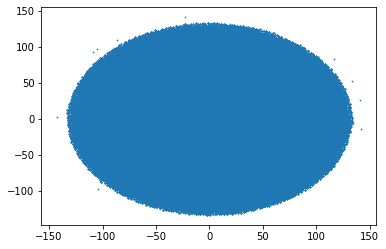

In [44]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X_embedded2 = TSNE(n_components=2, learning_rate='auto',\
                     init='random', perplexity=3).fit_transform(features[['DL_TRAFFIC_GB','REFERENCESIGNALPWR',
       'MAXIMUM_TRANSMIT_POWER', 'band', 'band_T', 'MIMO_Rank4','PRB_DL_AVAILABLE']].values)

plt.scatter(X_embedded2[:,0], X_embedded2[:,1], s = 0.5)

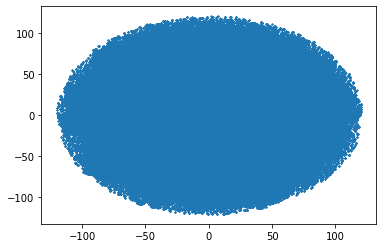

In [37]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X_embedded = TSNE(n_components=2, learning_rate='auto',\
                     init='random', perplexity=3).fit_transform(features.values)

plt.scatter(X_embedded[:,0], X_embedded[:,1], s = 0.5)

In [1]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], s = 0.5)

NameError: name 'plt' is not defined

In [48]:
features_train.isnull().sum()

DL_TRAFFIC_GB             0
DL_THROUGHPUT             0
UL_TRAFFIC_GB             0
DL_PRB_UTI                0
CCE_UTI                   0
VOLTE_DL_TRAFFIC_ERL      0
VOLTE_DL_TRAFFIC_MB       0
VOLTE_UL_TRAFFIC_MB       0
AVG_ACTIVE_UE_DL          0
PRB_DL_AVAILABLE          0
CQI_AVERAGE               0
MIMO_RANK_2_PERCENTAGE    0
MIMO_RANK_3_PERCENTAGE    0
MIMO_RANK_4_PERCENTAGE    0
REFERENCESIGNALPWR        0
MAXIMUM_TRANSMIT_POWER    0
band                      0
band_T                    0
MIMO_Rank4                0
dtype: int64

In [49]:
features_test.isnull().sum()

DL_TRAFFIC_GB             0
DL_THROUGHPUT             0
UL_TRAFFIC_GB             0
DL_PRB_UTI                0
CCE_UTI                   0
VOLTE_DL_TRAFFIC_ERL      0
VOLTE_DL_TRAFFIC_MB       0
VOLTE_UL_TRAFFIC_MB       0
AVG_ACTIVE_UE_DL          0
PRB_DL_AVAILABLE          0
CQI_AVERAGE               0
MIMO_RANK_2_PERCENTAGE    0
MIMO_RANK_3_PERCENTAGE    0
MIMO_RANK_4_PERCENTAGE    0
REFERENCESIGNALPWR        0
MAXIMUM_TRANSMIT_POWER    0
band                      0
band_T                    0
MIMO_Rank4                0
dtype: int64

#### Training the model on with the paramters

In [37]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
model = xgb.XGBRegressor(eval_metric='rmse',seed=0,eta=0.2,reg_lambda=1,reg_alpha=0.5 )
#model = xgb.XGBRegressor(
model.fit(features_train.drop(['DL_THROUGHPUT'],axis=1), y_train)
y_predict_test = model.predict(features_test.drop(['DL_THROUGHPUT'],axis=1))

In [38]:
mse = mean_squared_error(y_test, y_predict_test)
r2 = r2_score(y_test, y_predict_test)

### Results

#### Test

mse:  10.5365248564329
r2_score:  0.9324561447475972


#### Train

In [40]:
y_predict_train = model.predict(features_train.drop(['DL_THROUGHPUT'],axis=1))
print(mean_squared_error(y_train, y_predict_train))
print(r2_score(y_train, y_predict_train))

8.779084924661722
0.9476694456882563


In [42]:
features_train.columns

Index(['DL_TRAFFIC_GB', 'DL_THROUGHPUT', 'UL_TRAFFIC_GB', 'DL_PRB_UTI',
       'CCE_UTI', 'VOLTE_DL_TRAFFIC_ERL', 'VOLTE_DL_TRAFFIC_MB',
       'VOLTE_UL_TRAFFIC_MB', 'AVG_ACTIVE_UE_DL', 'PRB_DL_AVAILABLE',
       'CQI_AVERAGE', 'MIMO_RANK_2_PERCENTAGE', 'MIMO_RANK_3_PERCENTAGE',
       'MIMO_RANK_4_PERCENTAGE', 'REFERENCESIGNALPWR',
       'MAXIMUM_TRANSMIT_POWER', 'band', 'band_T', 'MIMO_Rank4'],
      dtype='object')

In [41]:
pickle.dump(model,open('/data/u_AA/throughput_opt/parameters_model_new_KPI.pickle','wb'))

In [77]:
dry_run = pd.read_csv("/data/u_AA/throughput_opt/new_data_0602.csv")

In [10]:
dry_run =pd.read_csv("/data/u_AA/throughput_opt/BH KPIs.csv")

In [42]:
dry_run.shape

(240111, 18)

In [12]:
merged_lookup=pd.read_parquet('/data/u_AA/throughput_opt/parameters_lookup')

In [13]:
merged_lookup

,DATE_ID,HOUR_ID,SITE_ID,SITE_NENAME,CELL_NAME,MIMO_ADAPTIVE_SWITCH,FIXED_MIMO_MODE,MAXMIMORANKPARA,REFERENCESIGNALPWR,PB,DLBANDWIDTH,ULBANDWIDTH,SPECTRUMCLOUDSWITCH,PAPCOFF,MAXIMUM_TRANSMIT_POWER,CELL_MAP,DEVICENO,TILT
0,2024-03-18,13,UPP5566,LUPP5566,LUPP5566_55661_N_H_D6-1,NO_ADAPTIVE,TM4,Rank2,152,0,20M,20M,GL_SPECTRUM_CONCURRENCY,0.0,460.0,UPP5566_1800_1,2.0,50.0
1,2024-03-18,13,UPP5566,LUPP5566,LUPP5566_55662_N_H_D6-2,NO_ADAPTIVE,TM4,Rank2,152,0,20M,20M,GL_SPECTRUM_CONCURRENCY,0.0,460.0,UPP5566_1800_2,7.0,30.0
2,2024-03-18,13,UPP5566,LUPP5566,LUPP5566_55663_N_H_D6-3,NO_ADAPTIVE,TM4,Rank2,182,1,20M,20M,GL_SPECTRUM_CONCURRENCY,0.0,460.0,UPP5566_1800_3,11.0,20.0
3,2024-03-18,13,UPP5566,LUPP5566,LUPP5566_55664_N_H_D6-4,NO_ADAPTIVE,TM4,Rank2,182,1,20M,20M,GL_SPECTRUM_CONCURRENCY,0.0,460.0,UPP5566_1800_4,15.0,50.0
4,2024-03-18,13,UPP5566,LUPP5566,LUPP5566_45666_N_H_T8-1,NO_ADAPTIVE,TM4,None,179,1,20M,20M,None,0.0,470.0,UPP5566_2600_1,4.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41254,2024-03-18,13,CAI2553,GUL_CAI2553,LCAI2553_25531_N_H_D6-1,NO_ADAPTIVE,TM4,Rank4,170,0,20M,20M,None,0.0,478.0,CAI2553_1800_1,3.0,70.0
41255,2024-03-18,13,CAI2553,GUL_CAI2553,LCAI2553_25532_N_H_D6-2,NO_ADAPTIVE,TM4,Rank4,170,0,20M,20M,None,0.0,478.0,CAI2553_1800_2,8.0,90.0
41256,2024-03-18,13,CAI2553,GUL_CAI2553,LCAI2553_25533_N_H_D6-3,NO_ADAPTIVE,TM4,Rank4,152,0,20M,20M,None,0.0,460.0,CAI2553_1800_3,13.0,90.0
41257,2024-03-18,13,CAI2553,GUL_CAI2553,LCAI2553_25536_N_H_G1-1,NO_ADAPTIVE,TM4,None,182,0,5M,5M,None,0.0,460.0,CAI2553_0900_1,0.0,80.0


In [14]:
dry_run_param= pd.merge(dry_run,merged_lookup[['CELL_NAME','MAXMIMORANKPARA','REFERENCESIGNALPWR','MAXIMUM_TRANSMIT_POWER']],how='left',on='CELL_NAME')

In [15]:
dry_run_param[~dry_run_param.CELL_NAME.isin(dry_run.CELL_NAME.unique())]

,DATE_ID,HOUR_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,MAXMIMORANKPARA,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER


In [16]:
dry_run.isnull().sum()

DATE_ID                      0
HOUR_ID                      0
CELL_NAME                    0
DL_TRAFFIC_GB                0
DL_THROUGHPUT             1229
UL_THROUGHPUT             1229
UL_TRAFFIC_GB                0
DL_PRB_UTI                1229
CCE_UTI                    880
VOLTE_DL_TRAFFIC_ERL      1229
VOLTE_DL_TRAFFIC_MB       2106
VOLTE_UL_TRAFFIC_MB        877
AVG_ACTIVE_UE_DL          1261
PRB_DL_AVAILABLE          2655
CQI_AVERAGE                  0
MIMO_RANK_2_PERCENTAGE    1775
MIMO_RANK_3_PERCENTAGE    1775
MIMO_RANK_4_PERCENTAGE    1775
dtype: int64

In [83]:
dry_run_param.isnull().sum()

DATE_ID                        0
HOUR_ID                        0
CELL_NAME                      0
DL_TRAFFIC_GB                  0
DL_THROUGHPUT                466
UL_THROUGHPUT                466
UL_TRAFFIC_GB                  0
DL_PRB_UTI                     0
CCE_UTI                     1058
VOLTE_DL_TRAFFIC_ERL         466
VOLTE_DL_TRAFFIC_MB         1410
VOLTE_UL_TRAFFIC_MB          944
AVG_ACTIVE_UE_DL            2369
PRB_DL_AVAILABLE            1058
CQI_AVERAGE                    0
MAXMIMORANKPARA           573342
REFERENCESIGNALPWR        482678
MAXIMUM_TRANSMIT_POWER    482678
dtype: int64

In [17]:
dry_run_param.dropna(subset=['REFERENCESIGNALPWR','MAXIMUM_TRANSMIT_POWER'],inplace=True)

In [18]:
dry_run_param.isnull().sum()

DATE_ID                       0
HOUR_ID                       0
CELL_NAME                     0
DL_TRAFFIC_GB                 0
DL_THROUGHPUT                 0
UL_THROUGHPUT                 0
UL_TRAFFIC_GB                 0
DL_PRB_UTI                    0
CCE_UTI                     681
VOLTE_DL_TRAFFIC_ERL          0
VOLTE_DL_TRAFFIC_MB         680
VOLTE_UL_TRAFFIC_MB         680
AVG_ACTIVE_UE_DL            680
PRB_DL_AVAILABLE            681
CQI_AVERAGE                   0
MIMO_RANK_2_PERCENTAGE        0
MIMO_RANK_3_PERCENTAGE        0
MIMO_RANK_4_PERCENTAGE        0
MAXMIMORANKPARA           25960
REFERENCESIGNALPWR            0
MAXIMUM_TRANSMIT_POWER        0
dtype: int64

In [19]:
dry_run_param.MAXMIMORANKPARA.fillna('Rank2',inplace=True)

In [45]:
dry_run_param.describe().T

,count,mean,std,min,25%,50%,75%,max
DL_TRAFFIC_GB,70240.0,3.815201,2.719669,0.1003,1.70990,3.29920,5.348425,28.0729
DL_THROUGHPUT,70240.0,13.201813,12.449513,0.4062,5.17380,9.33145,16.827825,149.9433
UL_TRAFFIC_GB,70240.0,0.389297,0.391775,0.0011,0.12420,0.28075,0.529100,8.1168
DL_PRB_UTI,70240.0,46.357232,27.976856,1.0140,21.87325,43.97700,69.809250,99.9920
CCE_UTI,70240.0,26.222870,12.892096,2.1000,16.21000,25.05000,34.350000,84.6900
VOLTE_DL_TRAFFIC_ERL,70240.0,2.705360,4.539682,0.0000,0.18000,0.86000,3.110000,56.9500
VOLTE_DL_TRAFFIC_MB,70240.0,17.863834,28.819326,0.0000,1.46000,6.91500,20.892500,392.8500
VOLTE_UL_TRAFFIC_MB,70240.0,19.116710,31.383796,0.0000,1.47000,7.18000,22.180000,440.4300
AVG_ACTIVE_UE_DL,70240.0,36.061590,33.978944,0.0070,11.41250,26.38950,50.379750,402.9020
PRB_DL_AVAILABLE,70240.0,95.409112,5.935042,60.0000,92.00000,99.00000,100.000000,100.0000


In [20]:
dry_run_param.isnull().sum()

DATE_ID                     0
HOUR_ID                     0
CELL_NAME                   0
DL_TRAFFIC_GB               0
DL_THROUGHPUT               0
UL_THROUGHPUT               0
UL_TRAFFIC_GB               0
DL_PRB_UTI                  0
CCE_UTI                   681
VOLTE_DL_TRAFFIC_ERL        0
VOLTE_DL_TRAFFIC_MB       680
VOLTE_UL_TRAFFIC_MB       680
AVG_ACTIVE_UE_DL          680
PRB_DL_AVAILABLE          681
CQI_AVERAGE                 0
MIMO_RANK_2_PERCENTAGE      0
MIMO_RANK_3_PERCENTAGE      0
MIMO_RANK_4_PERCENTAGE      0
MAXMIMORANKPARA             0
REFERENCESIGNALPWR          0
MAXIMUM_TRANSMIT_POWER      0
dtype: int64

In [21]:
dry_run_param['CELL_NAME'] = dry_run_param['CELL_NAME'].str.replace('-', '_')
dry_run_param['band'] = dry_run_param["CELL_NAME"].str.split('_').str.get(-2)
dry_run_param['band_letter'] = dry_run_param['band'].str.get(0)

In [22]:
dry_run_param= dry_run_param[~(dry_run_param.DL_TRAFFIC_GB <= 0.1)]
dry_run_param= dry_run_param[~(dry_run_param.PRB_DL_AVAILABLE > 100)]
dry_run_param= dry_run_param[~(dry_run_param.DL_PRB_UTI== 0)]
dry_run_param= dry_run_param[(dry_run_param['band_letter']=='D') | (dry_run_param['band_letter']=='T')]
dry_run_param=dry_run_param[~((dry_run_param['REFERENCESIGNALPWR']<0 )|(dry_run_param['MAXIMUM_TRANSMIT_POWER']==65535))]

In [23]:
dry_run_param.columns

Index(['DATE_ID', 'HOUR_ID', 'CELL_NAME', 'DL_TRAFFIC_GB', 'DL_THROUGHPUT',
       'UL_THROUGHPUT', 'UL_TRAFFIC_GB', 'DL_PRB_UTI', 'CCE_UTI',
       'VOLTE_DL_TRAFFIC_ERL', 'VOLTE_DL_TRAFFIC_MB', 'VOLTE_UL_TRAFFIC_MB',
       'AVG_ACTIVE_UE_DL', 'PRB_DL_AVAILABLE', 'CQI_AVERAGE',
       'MIMO_RANK_2_PERCENTAGE', 'MIMO_RANK_3_PERCENTAGE',
       'MIMO_RANK_4_PERCENTAGE', 'MAXMIMORANKPARA', 'REFERENCESIGNALPWR',
       'MAXIMUM_TRANSMIT_POWER', 'band', 'band_letter'],
      dtype='object')

In [24]:
dry_run_param.describe(include='all')

,DATE_ID,HOUR_ID,CELL_NAME,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,MAXMIMORANKPARA,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER,band,band_letter
count,70240,70240.000000,70240,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240,70240.000000,70240.000000,70240,70240
unique,3,NaN,23678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,8,2
top,16-MAY-24 00.00.00,NaN,LALX3988_39883_N_H_D4_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rank2,NaN,NaN,T8,D
freq,23435,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43537,NaN,NaN,18197,41205
mean,NaN,13.838667,NaN,3.815201,13.201813,1.934206,0.389297,46.357232,26.222870,2.705360,17.863834,19.116710,36.061590,95.409112,9.161755,34.899680,0.237506,0.016020,NaN,172.596241,459.870245,NaN,NaN
std,NaN,8.310585,NaN,2.719669,12.449513,1.299602,0.391775,27.976856,12.892096,4.539682,28.819326,31.383796,33.978944,5.935042,1.550264,19.427978,1.475941,0.199335,NaN,15.727731,17.382620,NaN,NaN
min,NaN,0.000000,NaN,0.100300,0.406200,0.107600,0.001100,1.014000,2.100000,0.000000,0.000000,0.000000,0.007000,60.000000,3.290000,0.000000,0.000000,0.000000,NaN,31.000000,339.000000,NaN,NaN
25%,NaN,5.000000,NaN,1.709900,5.173800,1.251800,0.124200,21.873250,16.210000,0.180000,1.460000,1.470000,11.412500,92.000000,8.040000,20.540000,0.000000,0.000000,NaN,152.000000,459.000000,NaN,NaN
50%,NaN,16.000000,NaN,3.299200,9.331450,1.760000,0.280750,43.977000,25.050000,0.860000,6.915000,7.180000,26.389500,99.000000,9.150000,32.300000,0.000000,0.000000,NaN,182.000000,460.000000,NaN,NaN
75%,NaN,22.000000,NaN,5.348425,16.827825,2.283725,0.529100,69.809250,34.350000,3.110000,20.892500,22.180000,50.379750,100.000000,10.260000,46.810000,0.050000,0.000000,NaN,182.000000,476.000000,NaN,NaN


In [25]:
dry_run_param.drop_duplicates(inplace=True)

In [26]:
dry_run_param.drop(['HOUR_ID','UL_THROUGHPUT'],axis=1,inplace=True)

In [27]:
dry_run_param.isnull().sum()

DATE_ID                   0
CELL_NAME                 0
DL_TRAFFIC_GB             0
DL_THROUGHPUT             0
UL_TRAFFIC_GB             0
DL_PRB_UTI                0
CCE_UTI                   0
VOLTE_DL_TRAFFIC_ERL      0
VOLTE_DL_TRAFFIC_MB       0
VOLTE_UL_TRAFFIC_MB       0
AVG_ACTIVE_UE_DL          0
PRB_DL_AVAILABLE          0
CQI_AVERAGE               0
MIMO_RANK_2_PERCENTAGE    0
MIMO_RANK_3_PERCENTAGE    0
MIMO_RANK_4_PERCENTAGE    0
MAXMIMORANKPARA           0
REFERENCESIGNALPWR        0
MAXIMUM_TRANSMIT_POWER    0
band                      0
band_letter               0
dtype: int64

In [28]:
dry_run_param=dry_run_param[dry_run_param['AVG_ACTIVE_UE_DL'].notna()]

In [29]:
categorical_val = dry_run_param.select_dtypes(['object'])
numerical_val= dry_run_param.select_dtypes(['float64','int64'])

In [30]:
encoded_categorical_val = pd.get_dummies(categorical_val , columns=['band_letter'],prefix=['band'],drop_first=True)
encoded_categorical_val = pd.get_dummies(encoded_categorical_val , columns=['MAXMIMORANKPARA'],prefix=['MIMO'],drop_first=True)

In [31]:
numerical_val

,DL_TRAFFIC_GB,DL_THROUGHPUT,UL_TRAFFIC_GB,DL_PRB_UTI,CCE_UTI,VOLTE_DL_TRAFFIC_ERL,VOLTE_DL_TRAFFIC_MB,VOLTE_UL_TRAFFIC_MB,AVG_ACTIVE_UE_DL,PRB_DL_AVAILABLE,CQI_AVERAGE,MIMO_RANK_2_PERCENTAGE,MIMO_RANK_3_PERCENTAGE,MIMO_RANK_4_PERCENTAGE,REFERENCESIGNALPWR,MAXIMUM_TRANSMIT_POWER
0,0.1933,31.8509,0.0086,3.208,5.46,0.00,0.00,0.00,0.982,98.0,8.99,14.79,0.00,0.00,152.0,460.0
1,0.1531,31.3562,0.0057,2.430,4.60,0.00,0.00,0.00,0.464,98.0,9.67,0.06,0.00,0.00,152.0,460.0
10,0.1538,15.4034,0.0186,5.117,8.66,0.00,0.01,0.01,2.028,100.0,9.10,34.78,0.00,0.00,152.0,460.0
11,0.2265,20.1632,0.0079,4.994,5.63,0.00,0.02,0.03,0.805,100.0,10.72,56.10,0.01,0.00,152.0,460.0
12,0.6279,28.8575,0.0170,7.294,6.19,0.00,0.00,0.00,1.315,100.0,10.52,42.57,0.00,0.00,152.0,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240038,1.8240,8.1334,0.1162,32.468,29.27,0.28,1.41,1.35,11.122,84.0,6.78,15.07,0.00,0.00,170.0,478.0
240039,1.0480,6.4509,0.0751,29.310,23.12,0.27,1.60,1.42,7.644,84.0,5.90,8.97,0.00,0.00,187.0,478.0
240040,1.8138,3.7252,0.1239,52.148,38.76,0.59,4.79,2.52,14.640,84.0,5.92,4.62,0.00,0.00,170.0,478.0
240041,1.7876,2.5141,0.1215,67.700,40.36,0.63,3.20,4.20,10.352,89.0,4.77,2.19,0.00,0.00,187.0,478.0


In [32]:
frequency = pickle.load(open('/data/u_AA/throughput_opt/band_encoding_parameters_new_KPI', 'rb'))
   
encoded_categorical_val['band'] = categorical_val['band'].map(frequency)

In [33]:
encoded_categorical_val

,DATE_ID,CELL_NAME,band,band_T,MIMO_Rank4
0,16-MAY-24 00.00.00,LALX3988_39883_N_H_D4_3,0.067883,0,0
1,16-MAY-24 00.00.00,LALX3988_39884_N_H_D4_4,0.067883,0,0
10,16-MAY-24 00.00.00,LALX3988_59886_N_H_T8_1,0.252813,1,1
11,16-MAY-24 00.00.00,LALX3988_59887_N_H_T8_2,0.252813,1,1
12,16-MAY-24 00.00.00,LALX3988_59888_N_H_T8_3,0.252813,1,1
...,...,...,...,...,...
240038,18-MAY-24 00.00.00,LUPP5691_36912_S_H_D6_2,0.256822,0,0
240039,18-MAY-24 00.00.00,LUPP5691_36914_U_H_D6_2,0.256822,0,0
240040,18-MAY-24 00.00.00,LUPP5691_36915_V_H_D6_2,0.256822,0,0
240041,18-MAY-24 00.00.00,LUPP5691_36916_R_H_D6_3,0.256822,0,0


In [34]:
encoded_categorical_val.isnull().sum()

DATE_ID       0
CELL_NAME     0
band          0
band_T        0
MIMO_Rank4    0
dtype: int64

In [35]:
features_val= pd.concat([numerical_val , encoded_categorical_val[['band','band_T','MIMO_Rank4']] ],axis=1)
y_val = features_val['DL_THROUGHPUT']

In [36]:
features_val.isnull().sum()

DL_TRAFFIC_GB             0
DL_THROUGHPUT             0
UL_TRAFFIC_GB             0
DL_PRB_UTI                0
CCE_UTI                   0
VOLTE_DL_TRAFFIC_ERL      0
VOLTE_DL_TRAFFIC_MB       0
VOLTE_UL_TRAFFIC_MB       0
AVG_ACTIVE_UE_DL          0
PRB_DL_AVAILABLE          0
CQI_AVERAGE               0
MIMO_RANK_2_PERCENTAGE    0
MIMO_RANK_3_PERCENTAGE    0
MIMO_RANK_4_PERCENTAGE    0
REFERENCESIGNALPWR        0
MAXIMUM_TRANSMIT_POWER    0
band                      0
band_T                    0
MIMO_Rank4                0
dtype: int64

### Dry run Results

In [37]:
model= pickle.load(open("/data/u_AA/throughput_opt/parameters_model_new_KPI.pickle",'rb'))

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
y_predict_val= model.predict(features_val.drop(['DL_THROUGHPUT'],axis=1))
print("MSE: ",mean_squared_error(y_val, y_predict_val))
print("R2: ",r2_score(y_val, y_predict_val))

MSE:  9.898039397844506
R2:  0.9361368028462624


In [40]:

import seaborn as sns
import matplotlib.pyplot as plt
def calculate_residuals(model, X, y):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(X)
    df_results = pd.DataFrame({'Actual': y, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    df_results["high_flag"] = df_results.apply(lambda row: row["Actual"] <= row["Predicted"], axis = 1)
    df_results["Error"] = df_results.apply(lambda row:"positive_error" if row["high_flag"] else "negative_error", axis = 1)
    #df_results['band_T']= X['band_T']
    return df_results
def linear_assumption(model, X, y):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, X, y)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7, hue = "Error")
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.iloc[:,:-1].min().min(), df_results.iloc[:,:-1].max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.xlabel('Actual Throughput')
    plt.ylabel('Predicted Throughput')
    plt.show()
    return df_results


### Residual Plot for the test data

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


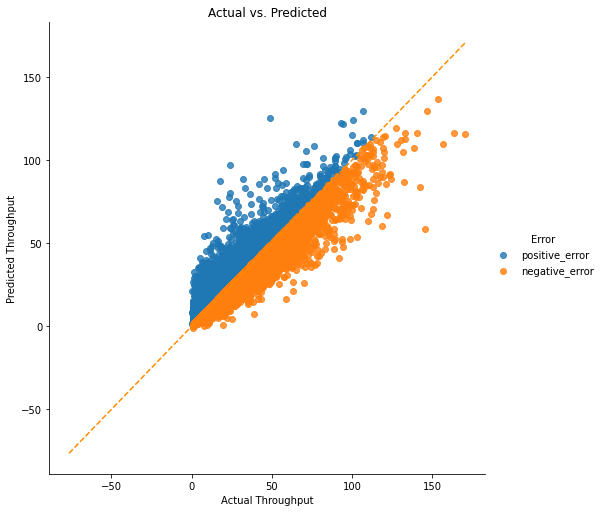

In [45]:
df_results_test= linear_assumption(model,features_test.drop(['DL_THROUGHPUT'],axis=1), y_test)

### Residual Plot for the Dry Run

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


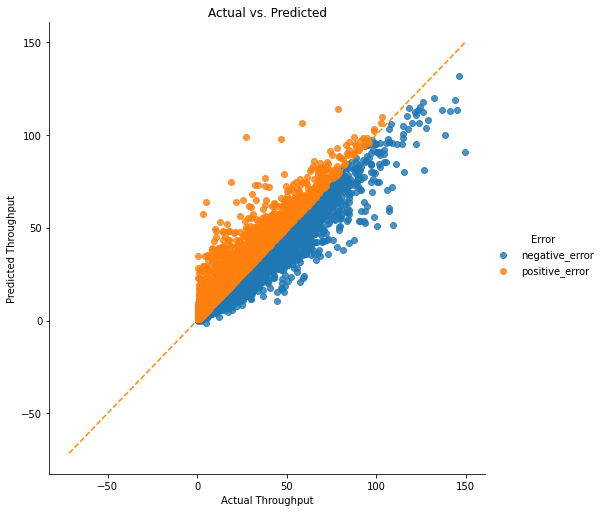

In [46]:
df_results_val= linear_assumption(model,features_val.drop(['DL_THROUGHPUT'],axis=1), y_val)

##  Iteration summary
#### Criteria:
* T and D bands
* more than 0.1 DL traffic 
* less than 100 PRB_DL_AVAILABLE
* not equal zero DL BW utilization
* adding parameters of refrence signal , max transmitted power and MIMO rank

#### Train Results : 
* mse = 9.2
* R2 = 0.94

#### Test Results : 
* mse = 11.2
* R2 = 0.93

#### Dry Run Results : 
* mse = 10.76
* R2 = 0.93

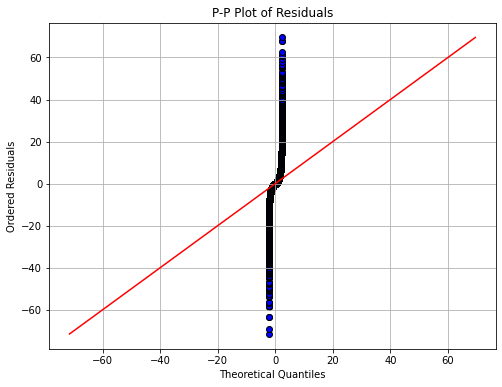

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

sorted_residuals = np.sort(df_results_val.Residuals)

# Calculate the theoretical quantiles based on a normal distribution
normal_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(sorted_residuals)))

# Create the P-P plot
plt.figure(figsize=(8, 6))
plt.scatter(normal_quantiles, sorted_residuals, color='blue', edgecolors='k')
plt.plot(sorted_residuals, sorted_residuals, color='red')  # Add a diagonal line for reference
plt.title('P-P Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Residuals')
plt.grid(True)
plt.show()

In [110]:
cells_params_30D.MAXIMUM_TRANSMIT_POWER.value_counts().sort_index()

401.0       120
407.0        60
418.0        30
425.0        30
428.0        36
430.0    131769
431.0       120
435.0       308
437.0        90
440.0      2638
441.0        30
442.0        30
443.0       119
447.0        73
448.0     31066
449.0       540
454.0        30
455.0       120
458.0        60
459.0       705
460.0    237313
461.0       450
464.0       300
465.0       420
466.0        30
467.0      1104
468.0        30
469.0       120
470.0     56399
471.0        30
472.0       120
473.0     24554
476.0     45156
477.0     14820
478.0    120074
479.0        30
482.0        60
490.0     15684
Name: MAXIMUM_TRANSMIT_POWER, dtype: int64

In [111]:
cells_params_30D.REFERENCESIGNALPWR.value_counts().sort_index()

120.0       423
122.0      2076
129.0        60
132.0        30
140.0       210
142.0        30
149.0       329
150.0      3456
152.0    184959
157.0     29999
159.0        81
160.0      2569
162.0      7471
163.0       239
164.0       657
166.0       324
167.0        30
168.0      3526
169.0      4440
170.0     36483
172.0       797
176.0        30
179.0     17276
180.0       133
181.0        59
182.0    271864
183.0      4317
184.0     20919
186.0      4659
187.0     30121
190.0        30
191.0        60
192.0     21543
193.0      1548
194.0       300
198.0       187
199.0     10359
200.0     20949
211.0       415
212.0      1533
215.0        60
217.0        87
223.0        30
Name: REFERENCESIGNALPWR, dtype: int64